<a href="https://colab.research.google.com/github/Mikky-sout/ImageProcessingOnly/blob/main/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Mask detection

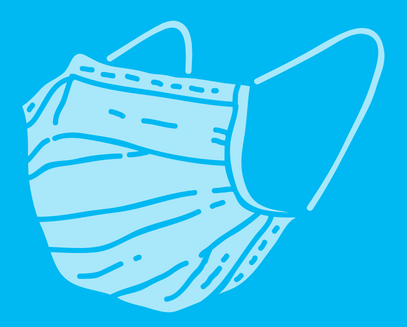

# Step
**1. Preparing Data (Train-test split, Data augmentation)**
**2. **

In [ ]:
import tensorflow.keras.applications.mobilenet_v2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import keras
import glob
from keras.preprocessing import image
from keras import Model,Input
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Train data

**Prepare dataset**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

Load image

In [ ]:
data = []
labels = []

DIRECTORY = r"/content/drive/MyDrive/dataset"
CATEGORIES = ["with_mask", "without_mask"]

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(150, 150))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



In [ ]:
labelDF = pd.DataFrame(labels)
labelDF

,0
0,with_mask
1,with_mask
2,with_mask
3,with_mask
4,with_mask
...,...
3828,without_mask
3829,without_mask
3830,without_mask
3831,without_mask


In [ ]:
withMask=0
withoutMask  =0
for i in labels:
  if i == 'with_mask':
    withMask +=1
  else:
    withoutMask +=1

In [ ]:
import plotly.express as px

In [ ]:
labelsType = pd.DataFrame()
n = [withMask,withoutMask]
ntype = ['with_mask','without_mask']
labelsType['type'] = ntype
labelsType['n_img'] = n
labelsType
fig = px.bar(labelsType,x='type',y='n_img',range_y=[1900,1920])
fig.show()

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)


In [ ]:
labelsDf = pd.DataFrame(labels)
labelsDf

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
3828,0.0,1.0
3829,0.0,1.0
3830,0.0,1.0
3831,0.0,1.0


In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(data, labels,test_size=0.30, stratify=labels, random_state=23)

**Create ImageDataGenerator**

In [ ]:
datagen = ImageDataGenerator(rotation_range=45,
	                                            zoom_range=0.25,
	                                            width_shift_range=0.2,
	                                            height_shift_range=0.2,
	                                            shear_range=0.15,
	                                            horizontal_flip=True,
	                                            fill_mode="nearest")

In [ ]:
train_generator=datagen.flow_from_directory('/content/drive/MyDrive/dataset', # this is where you specify the path to the main data folder
    target_size=(150,150), color_mode='rgb',
    batch_size=32,
    class_mode='categorical', seed = 23,
    shuffle=True)

Found 3833 images belonging to 2 classes.


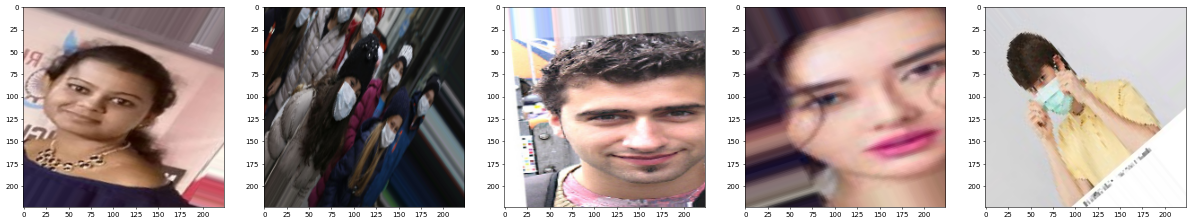

In [ ]:
plt.figure(figsize=(30, 20), dpi=50)
for i in range(5):
  batch = train_generator.next()
  Img_train = (batch[0]).astype('uint8')
  plt.subplot(1,5,i+1)
  plt.imshow(Img_train[0])

**Create Model**

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [ ]:
base_model = MobileNet(weights ='imagenet',include_top=False,input_tensor=Input(shape=(150, 150, 3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten(name="flatten")(x)
x = Dense(512,activation='relu')(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(2,activation='softmax')(x)

model = Model(inputs = base_model.input,outputs=preds)
model.summary()

for layer in base_model.layers:
	layer.trainable = False

Model: "model_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_156 (InputLayer)      [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                                  

**Create Optimizer , parameters**

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
EP = 30
BS = 64
training_Model = model.fit(datagen.flow(train_X, train_Y, batch_size=BS),
	steps_per_epoch=len(train_X) // BS,
	validation_data=(test_X, test_Y),
	validation_steps=len(test_X) // BS,
	epochs=EP)

Epoch 1/30
41/41 [==============================] - 29s 443ms/step - loss: 0.2233 - accuracy: 0.9317 - val_loss: 0.0282 - val_accuracy: 0.9922
Epoch 2/30
41/41 [==============================] - 16s 388ms/step - loss: 0.0761 - accuracy: 0.9759 - val_loss: 0.0277 - val_accuracy: 0.9887
Epoch 3/30
41/41 [==============================] - 16s 398ms/step - loss: 0.0694 - accuracy: 0.9771 - val_loss: 0.0134 - val_accuracy: 0.9974
Epoch 4/30
41/41 [==============================] - 16s 388ms/step - loss: 0.0551 - accuracy: 0.9798 - val_loss: 0.0216 - val_accuracy: 0.9896
Epoch 5/30
41/41 [==============================] - 16s 394ms/step - loss: 0.0364 - accuracy: 0.9878 - val_loss: 0.0085 - val_accuracy: 0.9957
Epoch 6/30
41/41 [==============================] - 16s 383ms/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.0180 - val_accuracy: 0.9930
Epoch 7/30
41/41 [==============================] - 16s 391ms/step - loss: 0.0523 - accuracy: 0.9859 - val_loss: 0.0235 - val_accuracy: 0.9896

# Predict and Plotting result

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred = model.predict(test_X, batch_size=BS)
y_true = test_Y
pred_max = np.argmax(pred, axis=1)
y_true = np.argmax(y_true, axis=1)
y_train = np.argmax(train_Y, axis=1) 

In [ ]:
print("Test accuracy:", accuracy_score(y_true, pred_max))

Test accuracy: 0.9965217391304347


In [ ]:
print('--------- Confusion matrix-----------')
print(confusion_matrix(test_Y.argmax(axis=1), pred_max))
print('--------- Classification Report matrix -----------')
print(classification_report(test_Y.argmax(axis=1), pred_max,
	target_names=lb.classes_))

--------- Confusion matrix-----------
[[574   1]
 [  3 572]]
--------- Classification Report matrix -----------
              precision    recall  f1-score   support

   with_mask       0.99      1.00      1.00       575
without_mask       1.00      0.99      1.00       575

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150



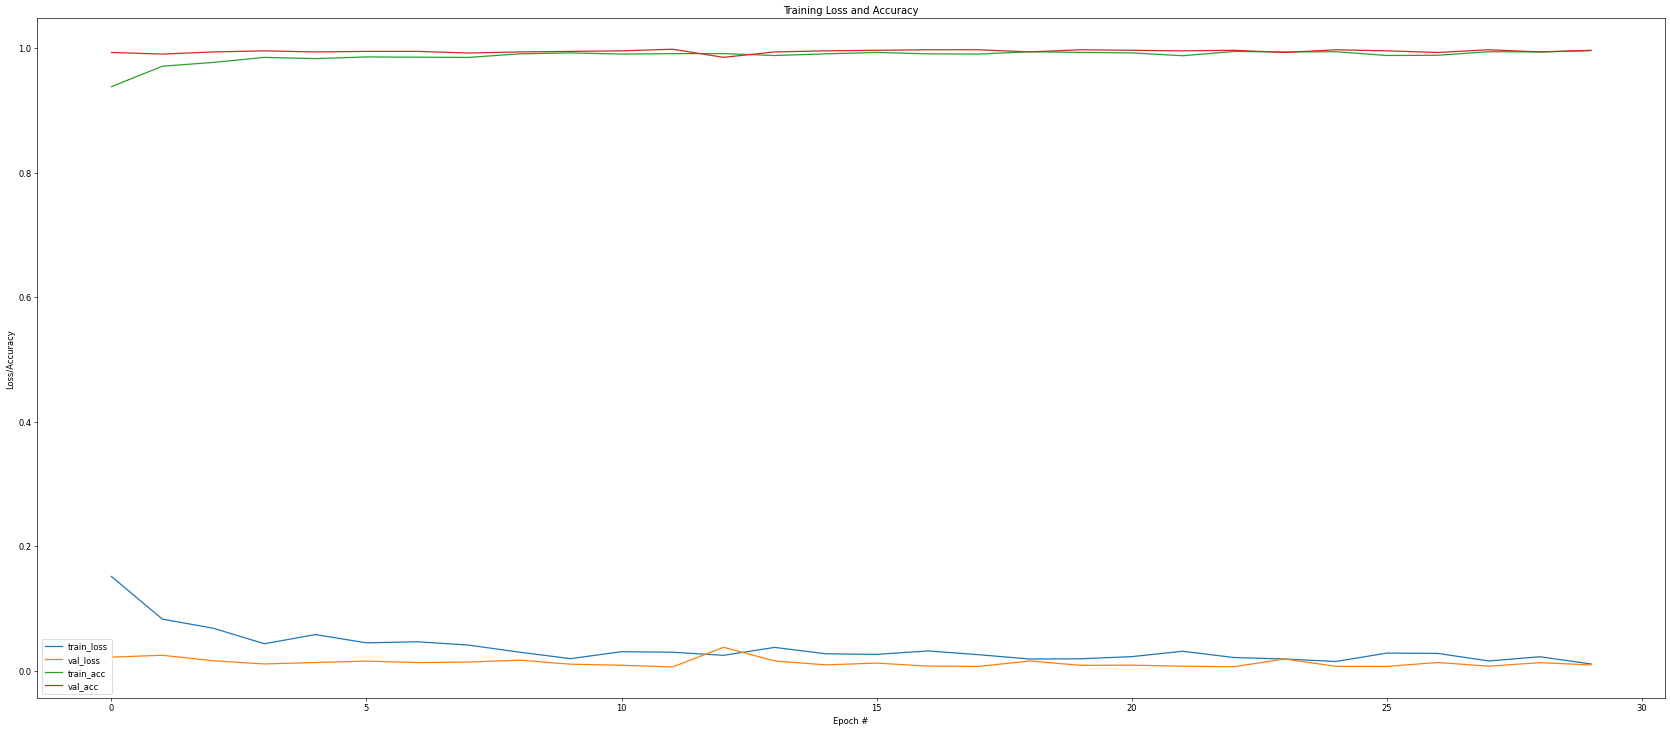

In [ ]:
N = EP
plt.figure(figsize=(35, 15), dpi=60)
plt.plot(np.arange(0, N), training_Model.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), training_Model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), training_Model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), training_Model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

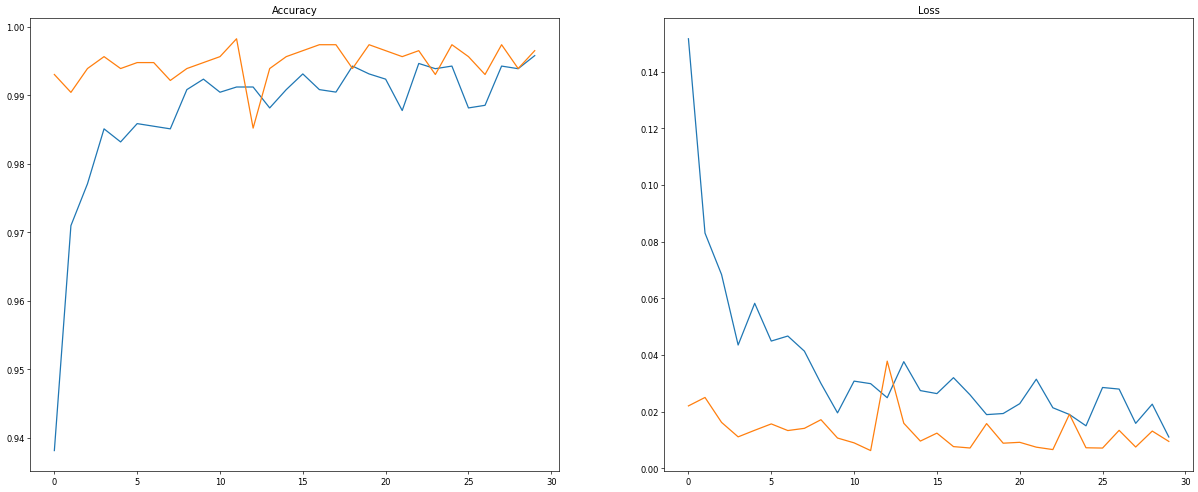

In [ ]:
plt.figure(figsize=(25, 10), dpi=60)
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(training_Model.history["accuracy"], label="Train_acc")
plt.plot(training_Model.history["val_accuracy"], label="Validate_acc")
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(training_Model.history['loss'], label="Train_loss")
plt.plot(training_Model.history['val_loss'], label="Validate_loss")

# Save Model

In [ ]:
model.save("/content/drive/MyDrive/Project.model", save_format="h5")

# Application section

# GridSearch (Hyperparameter)

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model(optimizer='adam'):
  base_model = MobileNet(weights ='imagenet',include_top=False,input_tensor=Input(shape=(150, 150, 3)))

  #append additional layer
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Flatten(name="flatten")(x)
  x = Dense(512,activation='relu')(x)
  x = Dense(128,activation='relu')(x)
  x = Dropout(0.5)(x)
  preds = Dense(2,activation='softmax')(x)

  #define input and output layers
  model = Model(inputs = base_model.input,outputs=preds)

  #define trainable layer
  for layer in base_model.layers:
    layer.trainable = False
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model_gs = KerasClassifier(build_fn=create_model,verbose=1)
EPList = [10,20,30]
BSList = [16,32,64]
OPlist = ['Adam']
param_grid = dict(optimizer=OPlist,epochs=EPList,batch_size=BSList)
grid = GridSearchCV(estimator=model_gs, param_grid=param_grid,  cv=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
grid_result = grid.fit(train_X, train_Y)

Epoch 1/10
84/84 [==============================] - 4s 24ms/step - loss: 0.1429 - accuracy: 0.9575
Epoch 2/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0283 - accuracy: 0.9918
Epoch 3/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0519 - accuracy: 0.9873
Epoch 4/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0247 - accuracy: 0.9940
Epoch 5/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0159 - accuracy: 0.9955
Epoch 6/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 7/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0058 - accuracy: 0.9970
Epoch 8/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0101 - accuracy: 0.9970
Epoch 9/10
84/84 [==============================] - 2s 23ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 10/10
84/84 [==============================] - 3s 23ms/step - loss: 0.0382 - accuracy: 0.9948
Epoch 1/1

In [ ]:
print('Best params: ',grid_result.best_params_)
print('Best params: ',grid_result.best_score_)

Best params:  {'batch_size': 64, 'epochs': 30, 'optimizer': 'Adam'}
Best params:  0.9936633706092834


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
data = pd.DataFrame()
data['params'] = params
data['means'] = means
data['stds'] = stds

data

,params,means,stds
0,"{'batch_size': 16, 'epochs': 10, 'optimizer': ...",0.992918,0.001866
1,"{'batch_size': 16, 'epochs': 20, 'optimizer': ...",0.992546,0.000003
2,"{'batch_size': 16, 'epochs': 30, 'optimizer': ...",0.992546,0.000003
3,"{'batch_size': 32, 'epochs': 10, 'optimizer': ...",0.991428,0.000370
4,"{'batch_size': 32, 'epochs': 20, 'optimizer': ...",0.989189,0.006340
5,"{'batch_size': 32, 'epochs': 30, 'optimizer': ...",0.992545,0.001494
6,"{'batch_size': 64, 'epochs': 10, 'optimizer': ...",0.991055,0.000742
7,"{'batch_size': 64, 'epochs': 20, 'optimizer': ...",0.991800,0.000742
8,"{'batch_size': 64, 'epochs': 30, 'optimizer': ...",0.993663,0.001121


# KFold

In [ ]:
from sklearn import model_selection
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
Num_fold = 3
Seed = 23
model_kf = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)
kfold = model_selection.KFold(n_splits=Num_fold,shuffle = True,random_state = Seed)
score = model_selection.cross_val_score(model_kf,train_X,train_Y,cv=kfold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
28/28 [==============================] - 4s 72ms/step - loss: 0.2495 - accuracy: 0.9262
Epoch 2/10
28/28 [==============================] - 2s 71ms/step - loss: 0.0432 - accuracy: 0.9860
Epoch 3/10
28/28 [==============================] - 2s 71ms/step - loss: 0.0313 - accuracy: 0.9911
Epoch 4/10
28/28 [==============================] - 2s 70ms/step - loss: 0.0129 - accuracy: 0.9950
Epoch 5/10
28/28 [==============================] - 2s 71ms/step - loss: 0.0101 - accuracy: 0.9989
Epoch 6/10
28/28 [==============================] - 2s 73ms/step - loss: 0.0078 - accuracy: 0.9978
Epoch 7/10
28/28 [==============================] - 2s 72ms/step - loss: 0.0048 - accuracy: 0.9994
Epoch 8/10
28/28 [==============================] - 2s 71ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 9/10
28/28 [==============================] - 2s 71ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 10/10
14/14 [==============================] - 2s 70ms/step - loss: 0.0031 - accuracy: 0.9978
Epoch 1/1

In [ ]:
print(score.mean())
print(score)

0.9932894309361776
[0.99776536 0.98993289 0.99217004]
